# ARC5 - Résultats 

Dans ce document, nous réalisons l'analyse statistique des données issus de l'activité de l'ARC5 et des Cluster 13 et 14. L'objectif est de comprendre comment les données recueillies permettent d'éclairer différents axes sur la nature des partenariats et du réseau entretenus par l'ARC5 au cours de ces activités entre 2009 et 2016.

Afin de rendre plus claire notre démarche nous structurons les graphes sous forme de questions / réponses. La question est le titre du graphe et correspond à un angle précis d'interrogation liés aux données disponibles utilisées ici.

Les quelques fonctions ci-dessous sont utilisés pour l'affichage et le pré-traitement des données.

In [134]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

%matplotlib inline
import seaborn as sns

import os
import csv
import json
import networkx as nx
from collections import Counter
import dateutil.parser as parser
from slugify import slugify

from IPython.display import display, Markdown, Latex
from matplotlib.pyplot import pie, axis, show

def show_table( title, array):
    md_table = ""
    display(Markdown(title))
    md_table += "| | Nom | Quantité |\n"
    md_table += "| --- | --- | --- |\n"
    for i,c in enumerate(Counter(array).most_common()):
        md_table +="| %s | %s | %s | \n"%(i,c[0], c[1])
    display(Markdown(md_table))

def moyenne(tableau):
    """Calculer une moyenne d'après un tableau"""
    return sum(tableau, 0.0) / len(tableau)

def count_plot(list_to_count, title=None, xlabel=None, ylabel="Count", order=None):
    
    g = sns.countplot(list_to_count, palette="Set2", order=order)

    # remove the top and right line in graph
    sns.despine()

    # size
    g.figure.set_size_inches(7, 6)

    # axes 
    g.set_xlabel(xlabel.decode('utf-8'),size = 16,  alpha=0.5)
    g.set_ylabel(ylabel.decode('utf-8'),size = 16,  alpha=0.5)

    # title
    g.axes.set_title(title.decode('utf-8'), 
        fontsize=18, color="b",alpha=0.3, x=0.5, y=1.1)
    
    # show
    sns.plt.show()
    
    return g

In [135]:
# charger toutes les infos

infos = {}
fichier_nodes = "../final/ARC5-Final - Noms (tous).csv"

with open( fichier_nodes, "r") as f :
    reader = csv.DictReader(f)
    for line in reader :
        
        info = {
            "nom" : line["Nom"], 
            "type" : line["Type"], 
            "start" : int(line["Début"]),            
            "end" : int(line["Fin"]),
            "ville" :  line["Ville"],
            "lien" :  line["Lien"]
        }
        
        slug = "%s-%s"%(slugify( line["Nom"].decode('utf-8')), line["Type"].decode('utf-8'))
        
        infos [slug] = info

# Importer le graphe des partenaires

D'abord nous importons les données de graphe calculées précédemment.

In [136]:
# load grap with everything inside
from networkx.readwrite import read_gpickle

# with projects
display(Markdown("## Graphes avec les projets "))

G_with_projects = read_gpickle('../final/ARC5-nx-with-projects.pickle')
print "%s nodes"%len(G_with_projects.nodes())
print "%s edges"%len(G_with_projects.edges())

show_table( "## Type des partenaires", [ n[1]["type"] for n in G_with_projects.nodes(data=True) ])

# without projects
display(Markdown("## Graphes sans les projets "))

G_without_projects = read_gpickle('../final/ARC5-nx-without-projects.pickle')
print "%s nodes"%len(G_without_projects.nodes())
print "%s edges"%len(G_without_projects.edges())

show_table( "## Type des partenaires", [ n[1]["type"] for n in G_without_projects.nodes(data=True) ])


## Graphes avec les projets 

400 nodes
560 edges


## Type des partenaires

| | Nom | Quantité |
| --- | --- | --- |
| 0 | ADR | 65 | 
| 1 | laboratoire | 62 | 
| 2 | projet | 55 | 
| 3 | médiation | 52 | 
| 4 | patrimoine | 45 | 
| 5 | création | 37 | 
| 6 | localité | 36 | 
| 7 | etablissement | 14 | 
| 8 | enseignement | 11 | 
| 9 | ecole-doctorale | 10 | 
| 10 | économique | 6 | 
| 11 | cst | 6 | 
| 12 | postdoc | 1 | 


## Graphes sans les projets 

279 nodes
1021 edges


## Type des partenaires

| | Nom | Quantité |
| --- | --- | --- |
| 0 | laboratoire | 62 | 
| 1 | médiation | 52 | 
| 2 | patrimoine | 45 | 
| 3 | création | 37 | 
| 4 | localité | 36 | 
| 5 | etablissement | 14 | 
| 6 | enseignement | 11 | 
| 7 | ecole-doctorale | 10 | 
| 8 | économique | 6 | 
| 9 | cst | 6 | 


## Les Allocations Doctorales de Recherche (ADR)

Dans un premier temps, nous allons nous attacher à étudier différents aspects des financement attribués au ADRs (travaux de thèses).

In [137]:
display(Markdown("### Liste des Thèses (d'après le graphe)"))

theses = [n for n in G_with_projects.nodes(data=True) if n[1]["type"] == "ADR" and n[1]["orga"] == "ARC5"]
print "%s thèses"%len(theses)

# Nombre de thèses (cluster 13 et 14 puis ARC5)
theses_partenaires = []
theses_labos = []
theses_etablissements = []
theses_villes = []

liste_these = ""
# Nombre de thèses avec partenaires (socio-économiques et socio-culturels)
for these in theses: 
    neighbors = G_with_projects.neighbors(these[0])
    liste_these += "**%s** \n\n"%these[1]["name"]
    liste_these += "* total liens : %s \n"%len(neighbors)
    liste_these += "* type de liens  : %s \n"%Counter([G_with_projects.node[n]["type"] for n in neighbors])
    
    labos = [ n for n in neighbors if G_with_projects.node[n]["type"] == "laboratoire" ]
    theses_labos.append( labos )

    liste_these += "* nombre de labos partenaires : %s\n"%len(labos)
    
    partenaires = [ n for n in neighbors if G_with_projects.node[n]["type"] not in ["projet","laboratoire", "ecole-doctorale", "etablissement", "ville", "these", "ADR" ] ]
    theses_partenaires.append(partenaires)
    liste_these += "* nombre total de partenaires (hors labo et etablissements) : %s\n"%len(partenaires)
    
    etablissements = [ n for n in neighbors if G_with_projects.node[n]["type"] == "etablissement" ]
    theses_etablissements.append(etablissements)
    liste_these += "* nombre total d'etablissements (hors labo) : %s\n"%len(etablissements)
    
    villes = [ n for n in neighbors if G_with_projects.node[n]["type"] == "ville" ]
    theses_villes.append(villes)
    liste_these += "* villes impliquées : %s \n\n"%len(villes)
    
    liste_these += "-"*15+"\n"

display(Markdown(liste_these))

### Liste des Thèses (d'après le graphe)

57 thèses


**Les critères d'évaluation des productions urbaines : Une socio-anthropologie de la création dans les arts de la rue** 

* total liens : 10 
* type de liens  : Counter({'m\xc3\xa9diation': 4, 'laboratoire': 2, 'ADR': 1, 'etablissement': 1, 'projet': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Pratiques et représentations féminines de la lecture (1830-1848)** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Le Journal de Lyon de Léonard Michon, notable lyonnais (1675-1746). Édition numérique critique** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Appropriation et traitement cognitif de représentations externes émergentes : paradoxe représentationnel et prise en compte de la spécificité du domaine d'application** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Républicanisme et économie : peut-il y avoir une économie politique républicaine ? Une approche pluridisciplinaire.** 

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Une approche générique pour la construction d'éditions critiques électroniques de corpus documentaires multistructurés.** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Enjeux intellectuels et sociaux d une controverse en histoire des sciences et/ou en histoire de la philosophie (fin XVIe siècle - début XVIIIe siècle)** 

* total liens : 5 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Sciences, croyances et laïcité : quelles pratiques éducatives et culturelles face à l’existence de représentations créationnistes ? Implications pour une formation réflexive des médiateurs de sciences.** 

* total liens : 6 
* type de liens  : Counter({'laboratoire': 1, 'enseignement': 1, 'etablissement': 1, 'ecole-doctorale': 1, 'cst': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**La médiatisation des techniques financières en France et en Grande-Bretagne depuis 1987** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Images iconiques et images virtuelles dans la patrimonialisation des régions post-industrielles : le cas des agglomérations de Saint Etienne et de Cardiff** 

* total liens : 5 
* type de liens  : Counter({'ADR': 1, 'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Analyse des représentations, attitudes et positionnements de publics jeunes à l’égard des sciences et techniques appréhendés via la mise en récit.** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1, 'cst': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Mémoires et identités urbaines : le patrimoine industriel entre oubli et valorisation** 

* total liens : 6 
* type de liens  : Counter({'patrimoine': 3, 'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Continuités et renouvellements de l’engagement féministe : cas du Planning familial en Rhône-Alpes** 

* total liens : 5 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'ADR': 1, 'm\xc3\xa9diation': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Paléographie musicale assistée  : instrumentation numérique pour l'analyse et l’édition de partitions musicales manuscrites inédites** 

* total liens : 5 
* type de liens  : Counter({'laboratoire': 1, 'enseignement': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Les réfugiés huguenots du Dauphiné** 

* total liens : 5 
* type de liens  : Counter({'laboratoire': 1, 'cr\xc3\xa9ation': 1, 'patrimoine': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Evaluation des acquisitions des élèves dans les démarches d'investigation : Jeux entre évaluations formatives et autorégulation des apprentissages.** 

* total liens : 4 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Documenter la danse: les gestes performatifs et numériques** 

* total liens : 10 
* type de liens  : Counter({'cr\xc3\xa9ation': 4, 'm\xc3\xa9diation': 2, 'laboratoire': 1, 'enseignement': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 7
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Félix Thiollier et le livre** 

* total liens : 12 
* type de liens  : Counter({'patrimoine': 5, 'laboratoire': 2, 'ADR': 1, 'etablissement': 1, 'projet': 1, 'ecole-doctorale': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 6
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Le passage au numérique des médias locaux entre mutations médiatiques et mutations territoriales : du bouleversement des pratiques professionnelles à la reconfiguration des identités locales** 

* total liens : 4 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Réflexion sémantique et esthétique autour des usages cartographiques. XVII-XXIe. Pratiques culturelles croisées.** 

* total liens : 6 
* type de liens  : Counter({'laboratoire': 2, 'patrimoine': 1, 'etablissement': 1, 'ADR': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Vertus et faiblesses du crowd-sourcing : Évaluation qualitative et quantitative de la transcription de fonds patrimoniaux** 

* total liens : 7 
* type de liens  : Counter({'projet': 2, 'laboratoire': 2, 'etablissement': 1, 'patrimoine': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Initiation scientifique en CP et en CE1 et apprentissages langagiers : quelles pratiques efficaces pour les élèves provenant de milieux défavorisés ?** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'enseignement': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Méthodes d’aide à la navigation, la lecture et l’exploitation des images des correspondances manuscrites dans l’Europe du 18ème siècle** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Enceintes tardives, communautés politiques et restructuration territoriale en rive gauche du Rhône : IIIe-Ve siècle de notre ère** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Arts et technologies de l’attention dans les machines à spectacles** 

* total liens : 7 
* type de liens  : Counter({'laboratoire': 2, 'cr\xc3\xa9ation': 2, 'projet': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Edition nativement numérique des œuvres hagiographiques inédites de Wauchier de Denain ms. BnF fr. 412 ** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Naissance et premiers développements des écoles d'économie politique chrétienne (France, 1815-1851)** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Politiques publiques de recherche : enquête philosophique sur les formes possibles de démocratisation** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Art Brut : quelle place pour les marges singulières ? Émergence et valorisation d’un projet de réseau d’art singulier en Rhône Alpes** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Développement d'interfaces pour le WEB destinées à rendre accessibles les outils de la création musicale contemporaine.** 

* total liens : 7 
* type de liens  : Counter({'enseignement': 3, 'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Documenter l’expérience habitante de la ville sur les réseaux sociaux : corpus photographiques et données numériques, le sens des collections** 

* total liens : 5 
* type de liens  : Counter({'ecole-doctorale': 1, 'patrimoine': 1, '\xc3\xa9conomique': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Sciences, techniques et esthétiques de l'éclairage sur les scènes parisiennes et lyonnaises, du théâtre romantique au premier cinéma.** 

* total liens : 6 
* type de liens  : Counter({'patrimoine': 2, 'laboratoire': 1, 'enseignement': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Les mutations de la médiation scientifique : le cas des journalistes scientifiques** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Elaboration d'une mémoire collective chez les réfugiés du génocide rwandais et de ses suites (1994 ? 1997) : du trauma à l'insertion en Rhône-Alpes** 

* total liens : 6 
* type de liens  : Counter({'ADR': 1, 'ecole-doctorale': 1, 'etablissement': 1, 'patrimoine': 1, 'laboratoire': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Extraction et catégorisation de lexiques transdisciplinaires d articles scientifiques de sciences humaines en vue de l indexation automatique** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Regards cinématographiques et gestes du travail : films d’amateurs et identifications locales et régionales des territoires de montagne en Rhône-Alpes, des années 1960 à 1975.** 

* total liens : 6 
* type de liens  : Counter({'patrimoine': 3, 'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Les éditions Paul Martial : une esthétique industrielle** 

* total liens : 7 
* type de liens  : Counter({'laboratoire': 2, 'ADR': 1, 'etablissement': 1, 'patrimoine': 1, 'projet': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Co-construction et expérimentation de dispositifs de formation de tuteurs pour l’amélioration des parcours d’apprentissage et de la transmission des savoirs en situation professionnelle** 

* total liens : 4 
* type de liens  : Counter({'ecole-doctorale': 1, 'enseignement': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**L’émergence du questionnement collectif dans la discussion à visée philosophique entre élèves : Comment apprend-t-on à s’interroger avec les autres ? ** 

* total liens : 6 
* type de liens  : Counter({'m\xc3\xa9diation': 2, 'laboratoire': 1, 'localit\xc3\xa9': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**L’événementialisation de la culture scientifique. Rôle et enjeux des manifestations culturelles dans la médiation des sciences ** 

* total liens : 8 
* type de liens  : Counter({'ADR': 1, 'ecole-doctorale': 1, 'etablissement': 1, 'patrimoine': 1, 'projet': 1, 'laboratoire': 1, 'cst': 1, 'cr\xc3\xa9ation': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Du manuscrit à l’imprimé : la révolution du livre à Lyon (1470-1520)** 

* total liens : 4 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'patrimoine': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Genre et groupe social : approche développementale de la construction précoce de l'identité sociolinguistique dans les interactions parents-enfants** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Le corps, le cancer et la chimiothérapie** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Formes et enjeux de la sociabilité dans les équipes de recherche en sciences humaines et sociales** 

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**"PROJET INTER-ARC Analyse de graphes dynamiques : application aux données Vélo'V Inter-arc  ARC 6.  TIC  et usages informatiques innovants  "** 

* total liens : 5 
* type de liens  : Counter({'laboratoire': 1, '\xc3\xa9conomique': 1, 'etablissement': 1, 'localit\xc3\xa9': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Les principes de justice dans l'économie saint-simonienne : un éclairage actuel sur les « socialismes ».** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Enjeux territoriaux de la communication scientifique : évolutions et nouvelles formes de l'édition scientifique d'ouvrages** 

* total liens : 7 
* type de liens  : Counter({'ADR': 1, 'ecole-doctorale': 1, 'etablissement': 1, 'projet': 1, 'laboratoire': 1, 'cst': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Le trésor de Brou et les stratégies dévotionnelles de  Marguerite d’Autriche et de sa cour : Essai de reconstitution in situ des collections léguées par Marguerite d’Autriche à sa fondation funéraire. ** 

* total liens : 5 
* type de liens  : Counter({'projet': 1, 'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Entre valeur affective et valeur d’usage : quel avenir pour les églises de la métropole Lyon Saint-Etienne ?** 

* total liens : 6 
* type de liens  : Counter({'patrimoine': 3, 'laboratoire': 1, 'etablissement': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Le temps du voyage : rythmes et perception de la durée dans les pratiques du voyage en Europe entre Lumières et romantisme (18e siècle-milieu 19e siècle)** 

* total liens : 3 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Contribution à une géographie du numérique** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, '\xc3\xa9conomique': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Approche numérique des revues françaises de géographie : pour une relecture épistémologique des savoirs géographiques** 

* total liens : 5 
* type de liens  : Counter({'laboratoire': 2, 'etablissement': 1, 'ADR': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**La prostitution entre Grenoble et Lyon du XVIIIe siècle au milieu du XIXe siècle. Représentations, espaces et pratiques** 

* total liens : 6 
* type de liens  : Counter({'patrimoine': 2, 'ADR': 1, 'ecole-doctorale': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Élaboration, mise en oeuvre et exploitation d'un modèle de description d'objets archéologiques complexes : le projet céramique 3.0** 

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Le développement d’une compétence interculturelle après classement d’un site au Patrimoine mondial de l’UNESCO, un pas vers le dialogue entre les peuples** 

* total liens : 8 
* type de liens  : Counter({'laboratoire': 2, 'ADR': 1, 'etablissement': 1, 'patrimoine': 1, 'projet': 1, 'ecole-doctorale': 1, 'cr\xc3\xa9ation': 1}) 
* nombre de labos partenaires : 2
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Négociants et entrepreneurs de Lyon au XVIIe siècle. Espaces, réseaux et pratiques du commerce sous l’Ancien Régime  ** 

* total liens : 5 
* type de liens  : Counter({'patrimoine': 1, 'laboratoire': 1, 'etablissement': 1, 'ADR': 1, 'ecole-doctorale': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------
**Au-delà de la « Manif pour tous » : sociologie des engagements féminins conservateurs** 

* total liens : 4 
* type de liens  : Counter({'ecole-doctorale': 1, 'etablissement': 1, 'ADR': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0 

---------------


In [138]:
fichier_theses = "../final/ARC5-Final - ARC5-ADR.csv"

villes_etablissements = {
  "UNIVERSITE JOSEPH FOURIER - GRENOBLE 1" : "Grenoble",
  "Ecole Nationale des Travaux Publics de l'Etat" : "Lyon",
  "UNIVERSITE JEAN MOULIN LYON 3" : "Lyon",
  "INSA LYON (Institut national des sciences appliquées de Lyon)" : "Lyon",
  "UNIVERSITE CLAUDE BERNARD - LYON 1" : "Lyon",
  "UNIVERSITE JEAN MONNET - SAINT ETIENNE" : "Saint-Etienne",
  "UNIVERSITE LUMIERE - LYON 2" : "Lyon",
  "UNIVERSITE PIERRE MENDES FRANCE - GRENOBLE 2" : "Grenoble",
  "ENS LYON (Ecole normale supérieure de Lyon)" : "Lyon",
  "IEP GRENOBLE (Institut d’Etudes Politiques de Grenoble)" : "Grenoble",
  "CNRS - Centre national de la recherche scientifique (Délégation Auvergne Rhône-Alpes)" : "Lyon",
  "UNIVERSITE STENDHAL GRENOBLE - 3" : "Grenoble",
  "UNIVERSITE DE SAVOIE" : "Chambéry",
  "ENSSIB (École nationale supérieure des sciences de l'information et des bibliothèques)" : "Lyon"
}


ecoles_doctorales = []
etablissements_theses = []
labos_theses = []

with open( fichier_theses, "r") as f :
    reader = csv.DictReader(f)
    for i, line in enumerate(reader) :
        ecoles_doctorales.append(line["Ecole doctorale"])
        etablissements_theses.append(line["Etablissement gestionnaire"])
        labos_theses.append(line["Laboratoire"])


display(Markdown("## Thèses"))

display(Markdown("### Combien y a-t-il de thèses au total ? "))
print "%s thèses"%(i+1) 
  
show_table("### Quelles sont les écoles doctorales impliquées dans la direction des thèses ?", ecoles_doctorales)

show_table("### Quelles sont les établissement gestionnaire des thèses ?", etablissements_theses)
    
show_table("### A quelles villes sont rattachées ces établissement ?", [villes_etablissements[t] for t in etablissements_theses] )

show_table("### Quels laboratoires  encadrent ces thèses ?", labos_theses)

## Thèses

### Combien y a-t-il de thèses au total ? 

57 thèses


### Quelles sont les écoles doctorales impliquées dans la direction des thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | ScSo, ED 483 (sciences sociales) | 12 | 
| 1 | LLSH, ED 50 (Langues, Littératures et Sciences Humaines) | 10 | 
| 2 | EPIC, 485 (Education - Psychologie - Information et Communication) | 9 | 
| 3 | SHPT, ED 454 (Sciences de l'homme, du politique et du territoire) | 8 | 
| 4 | 3LA, ED 484 (Lettres, langues, linguistique et arts) | 8 | 
| 5 | SEG, ED 486 (Sciences Economiques et de Gestion) | 3 | 
| 6 | PHCR, ED 487 (Philosophie, histoire, création, représentation ) | 2 | 
| 7 | Infomath, ED 512 | 2 | 
| 8 |  | 1 | 
| 9 | SIS, ED 488 (Sciences Ingénierie Santé) | 1 | 
| 10 | PHAST, ED 52 (Physique et Astrophysique) | 1 | 


### Quelles sont les établissement gestionnaire des thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | UNIVERSITE LUMIERE - LYON 2 | 15 | 
| 1 | UNIVERSITE STENDHAL GRENOBLE - 3 | 11 | 
| 2 | UNIVERSITE JEAN MONNET - SAINT ETIENNE | 9 | 
| 3 | UNIVERSITE PIERRE MENDES FRANCE - GRENOBLE 2 | 8 | 
| 4 | ENS LYON (Ecole normale supérieure de Lyon) | 5 | 
| 5 | UNIVERSITE JEAN MOULIN LYON 3 | 4 | 
| 6 | INSA LYON (Institut national des sciences appliquées de Lyon) | 2 | 
| 7 | UNIVERSITE CLAUDE BERNARD - LYON 1 | 2 | 
| 8 | IEP GRENOBLE (Institut d’Etudes Politiques de Grenoble) | 1 | 


### A quelles villes sont rattachées ces établissement ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | Lyon | 28 | 
| 1 | Grenoble | 20 | 
| 2 | Saint-Etienne | 9 | 


### Quels laboratoires  encadrent ces thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | LIDILEM (Laboratoire de Linguistique et Didactique des Langues Etrangères et Maternelles) | 5 | 
| 1 | LARHRA (Laboratoire de Recherche Historique Rhône-Alpes) | 4 | 
| 2 | Centre Max Weber (Laboratoire de sociologie) UMR 5283 | 4 | 
| 3 | ELICO (Équipe de recherche de Lyon en sciences de l'Information et de la COmmunication) | 3 | 
| 4 | CIEREC (Centre Interdisciplinaire d’Études et de Recherches sur l’Expression Contemporaine) | 3 | 
| 5 | GRESEC (Groupe de Recherche sur les Enjeux de la Communication ) | 3 | 
| 6 | LITT&ARTS (UMR 5316) | 3 | 
| 7 | S2HEP - Sciences, société, Historicité, Education, Pratiques | 3 | 
| 8 | EVS - Environnement Ville Société | 3 | 
| 9 | CRHIPA - Centre de Recherches en Histoire et histoire de l'art, Italie, Pays Alpins, interactions internationales | 3 | 
| 10 | LIRE (Littérature, Idéologies et Représentations aux XVIIIe et XIXe siècles) | 2 | 
| 11 | CIHAM – Histoire, Archéologie, Littératures des mondes chrétiens et musulmans médiévaux | 2 | 
| 12 | LIRIS (Laboratoire d'informatique en images et systèmes d'information) | 2 | 
| 13 | LSE - Laboratoire des Sciences de l'Éducation | 2 | 
| 14 | PLC (Philosophie, Langages & cognition) | 2 | 
| 15 |  | 1 | 
| 16 | EMC2 - LSG (Emotion Médiation Culture Connaissance - Laboratoire de sociologie de Grenoble) | 1 | 
| 17 | ERIC - Entrepôts, Représentation et Ingénierie des Connaissances | 1 | 
| 18 | Laboratoire de Physique de l’ENS de Lyon | 1 | 
| 19 | Triangle (Action, discours, pensée politique et économique) | 1 | 
| 20 | Passages XX-XXI (EA 4160) | 1 | 
| 21 | Institut Claude Longeon | 1 | 
| 22 | IRG - Institut de Recherche en Géographie | 1 | 
| 23 | IRPHIL - Institut de Recherches Philosophiques de Lyon | 1 | 
| 24 | Centre Norbert Elias | 1 | 
| 25 | ICAR (Interactions, Corpus, Apprentissages, Représentations) | 1 | 
| 26 | Pacte - Politiques publiques, ACtion politique, TErritoires (UMR 5194) | 1 | 
| 27 | GATE (Groupe d'Analyse et de Théorie Economique) | 1 | 


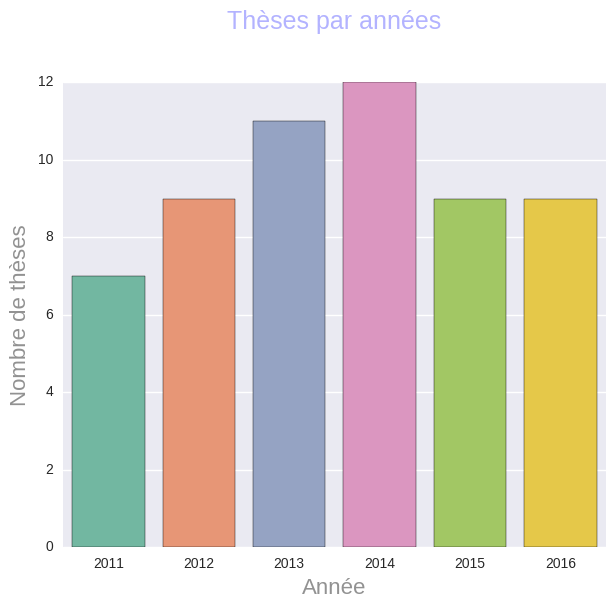

In [139]:
# Nombre de thèses par années
def getKey(item):
    return item[0]

years_start =[ parser.parse(str(these[1]["start"])).year for these in theses ]
count_plot([y for y in years_start ], ylabel="Nombre de thèses", xlabel="Année", title='Thèses par années')

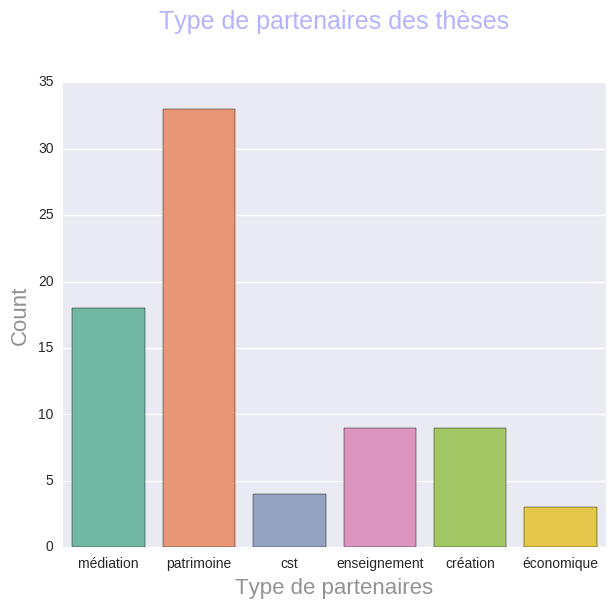

In [140]:
theses_partenaires_type = []
for ps in theses_partenaires: 
    theses_partenaires_type += [ G_with_projects.node[p]["type"] for p in ps if G_with_projects.node[p]["type"] != "ADR" and G_with_projects.node[p]["type"] != "localité" ]
count_plot([t.decode('utf-8') for t in theses_partenaires_type], xlabel="Type de partenaires", title='Type de partenaires des thèses')

* moyenne de partenaires par thèse : 1.36842105263


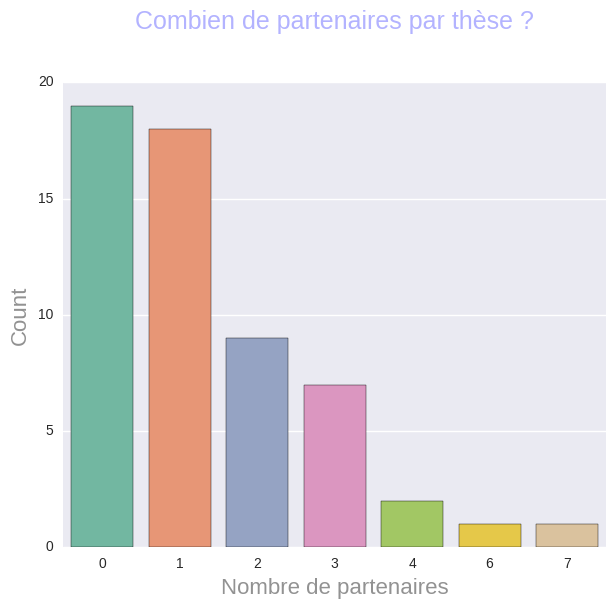

In [141]:
# Nombres et types d’organismes partenaires
print "* moyenne de partenaires par thèse : %s"%moyenne([len(p) for p in theses_partenaires])
count_plot([len(p) for p in theses_partenaires], xlabel="Nombre de partenaires", title='Combien de partenaires par thèse ?')    

In [142]:
# Qui sont les partenaires des thèses ? 
parts = []
for t in theses_partenaires: parts += [v.encode('utf-8') for v in t]
show_table("### Qui sont les partenaires des thèses ?", parts)

### Qui sont les partenaires des thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | bibliotheque-municipale-de-lyon-patrimoine | 5 | 
| 1 | musees-gadagne-patrimoine | 4 | 
| 2 | service-science-societe-de-luniversite-de-lyon-cst | 3 | 
| 3 | cnsmd-conservatoire-national-superieur-musique-et-danse-de-lyon-enseignement | 2 | 
| 4 | musee-dart-moderne-de-saint-etienne-metropole-patrimoine | 2 | 
| 5 | le-rize-patrimoine | 2 | 
| 6 | arald-agence-rhone-alpes-pour-le-livre-et-la-documentation-médiation | 1 | 
| 7 | direction-departementale-de-la-cohesion-sociale-de-lisere-médiation | 1 | 
| 8 | bibliotheque-municipale-de-grenoble-patrimoine | 1 | 
| 9 | festival-a-nous-de-voir-cinema-et-science-création | 1 | 
| 10 | musee-gallo-romain-de-lyon-fourviere-patrimoine | 1 | 
| 11 | musee-de-la-mine-saint-etienne-patrimoine | 1 | 
| 12 | webcastor-économique | 1 | 
| 13 | ensatt-ecole-nationale-superieure-darts-et-techniques-du-theatre-enseignement | 1 | 
| 14 | mfpf-rhone-mouvement-francais-pour-le-planning-familial-médiation | 1 | 
| 15 | palais-ideal-du-facteur-cheval-patrimoine | 1 | 
| 16 | musee-du-protestantisme-dauphinois-création | 1 | 
| 17 | inspection-academique-rectorat-de-lyon-enseignement | 1 | 
| 18 | federation-nationale-des-arts-de-la-rue-médiation | 1 | 
| 19 | museum-dhistoire-naturelle-de-grenoble-patrimoine | 1 | 
| 20 | service-de-linventaire-general-du-patrimoine-culturel-de-la-region-rhone-alpes-patrimoine | 1 | 
| 21 | musee-de-tervuren-belgique-patrimoine | 1 | 
| 22 | parc-zoologique-de-la-marie-de-lyon-médiation | 1 | 
| 23 | cco-centre-culturel-oecumenique-de-villeurbanne-médiation | 1 | 
| 24 | archives-departementales-de-la-loire-patrimoine | 1 | 
| 25 | mc2-maison-de-la-culture-de-grenoble-médiation | 1 | 
| 26 | acrimed-69-médiation | 1 | 
| 27 | institut-national-de-laudiovisuel-ina-delegation-centre-est-patrimoine | 1 | 
| 28 | sur-les-pas-des-huguenots-patrimoine | 1 | 
| 29 | maths-a-modeler-médiation | 1 | 
| 30 | cinematheque-des-pays-de-savoie-et-de-lain-patrimoine | 1 | 
| 31 | musee-dorsay-patrimoine | 1 | 
| 32 | direction-des-services-departementaux-de-leducation-nationale-de-lisere-enseignement | 1 | 
| 33 | horslesmurs-centre-national-de-ressource-des-art-de-la-rue-et-des-arts-du-cirque-médiation | 1 | 
| 34 | cinematheque-de-grenoble-patrimoine | 1 | 
| 35 | association-usine-sans-fin-patrimoine | 1 | 
| 36 | maison-de-la-danse-lyon-médiation | 1 | 
| 37 | musee-dauphinois-patrimoine | 1 | 
| 38 | formasup-ain-rhone-loire-centre-de-formation-par-apprentissage-enseignement | 1 | 
| 39 | grame-centre-national-de-creation-musicale-médiation | 1 | 
| 40 | d2t-metroscope-entreprise-conception-de-moteurs-économique | 1 | 
| 41 | conservatoire-militaire-de-musique-de-larmee-de-terre-cmmat-médiation | 1 | 
| 42 | la-maison-de-la-creation-saint-martin-dheres-création | 1 | 
| 43 | compagnie-des-zonzons-theatre-de-marionnettes-création | 1 | 
| 44 | lhexagone-scene-nationale-arts-sciences-création | 1 | 
| 45 | grand-lyon-localité | 1 | 
| 46 | labex-h2n-humanites-et-humanites-numeriques-médiation | 1 | 
| 47 | cnd-centre-national-de-la-danse-création | 1 | 
| 48 | ministere-de-leducation-nationale-médiation | 1 | 
| 49 | esad-ecole-superieure-dart-et-design-a-grenoble-valence-enseignement | 1 | 
| 50 | cie-gallota-compagnie-de-danse-création | 1 | 
| 51 | monastere-royal-de-brou-patrimoine | 1 | 
| 52 | cyclocity-lyon-économique | 1 | 
| 53 | conservatoire-a-rayonnement-regional-du-grand-chalon-enseignement | 1 | 
| 54 | eunetstar-european-network-of-street-theater-médiation | 1 | 
| 55 | cefedem-centre-de-formation-des-enseignants-de-la-musique-enseignement | 1 | 
| 56 | onda-office-national-de-diffusion-artistique-médiation | 1 | 
| 57 | service-conservation-du-patrimoine-du-rhone-patrimoine | 1 | 
| 58 | mediatheque-municipale-de-saint-etienne-patrimoine | 1 | 
| 59 | archives-municipales-de-lyon-patrimoine | 1 | 
| 60 | le-pacifique-centre-du-developpement-choregraphique-grenoble-création | 1 | 
| 61 | cie-yoann-bourgeois-compagnie-de-danse-création | 1 | 
| 62 | grenoble-ville-de-localité | 1 | 
| 63 | institut-lumiere-patrimoine | 1 | 
| 64 | aueg-alliance-universite-entreprise-de-grenoble-cst | 1 | 
| 65 | direction-de-la-culture-du-conseil-general-rhone-service-des-proprietes-departementales-médiation | 1 | 


In [143]:
# Nombre de thèses multi-sites

theses_partenaires_villes = [ infos[p.decode('utf-8')]["ville"].strip() for p in parts ]
show_table("### Dans quelles villes se trouvent les partenaires des thèses ?", theses_partenaires_villes )

### Dans quelles villes se trouvent les partenaires des thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | Lyon | 32 | 
| 1 | Grenoble | 14 | 
| 2 | Paris | 7 | 
| 3 | Villeurbanne | 6 | 
| 4 | Saint-Étienne | 3 | 
| 5 | Saint-Priest-en-Jarez | 2 | 
| 6 | Meylan | 2 | 
| 7 | Veyrier-du-lac | 1 | 
| 8 | Le Poët-Laval | 1 | 
| 9 | Tervuren (Belgique) | 1 | 
| 10 | Dieulefit | 1 | 
| 11 | Chalon-sur-Saône | 1 | 
| 12 | Hauterives | 1 | 
| 13 | Pantin | 1 | 
| 14 | Trappes | 1 | 
| 15 | Vaulx-en-Velin | 1 | 
| 16 | Satory | 1 | 
| 17 | Oullins | 1 | 
| 18 | Bourg-en-Bresse | 1 | 


In [144]:
# load main file with corrections
fichier_projets = "../final/ARC5-Final - Projets (tous).csv"

theses_axes = []
theses_villes = []

with open( fichier_projets, "r") as f :
    reader = csv.DictReader(f)
    for line in reader :
        if line["Orga"] == "ARC5" and line["Type"] == "ADR" :
            theses_axes.append(line["Axe"])
            theses_villes.append(line["Ville"])

show_table("### Quels axes pour les thèses ?", theses_axes )

### Quels axes pour les thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | Axe 1 : Cultures au pluriel | 25 | 
| 1 | Axe  3 : Sciences et techniques : cultures pratiques représentations | 20 | 
| 2 | Axe 2 : Cultures numériques | 12 | 


## Les Projets de Recherche

A part les Allocations de Recherche Doctorale, l'ARC5 a également financé des projets sur la période 2012-2013. Voici les résultats concernant ces projets, dits projets d'animations.


In [145]:
fichier_theses = "../final/ARC5-Final - ARC5-projets.csv"

etablissements_projets = []
labos_projets = []
villes_projets = []

with open( fichier_theses, "r") as f :
    reader = csv.DictReader(f)
    for i, line in enumerate(reader) :
        etablissements_projets.append(line["Etablissements de tutelle"])
        labos_projets.append(line["Laboratoire"])
        villes_projets.append(line["Ville"])


display(Markdown("## Projets"))

display(Markdown("### Combien y a-t-il de projets au total ? "))
print "%s projets"%(i+1) 

show_table("### Quelles sont les établissement gestionnaire des thèses ?", etablissements_projets)
    
show_table("### A quelles villes sont rattachées ces projets ?", villes_projets )

show_table("### Quels laboratoires  encadrent ces thèses ?", labos_projets)

## Projets

### Combien y a-t-il de projets au total ? 

67 projets


### Quelles sont les établissement gestionnaire des thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | UNIVERSITE STENDHAL GRENOBLE - 3 | 14 | 
| 1 | ENS LYON (Ecole normale supérieure de Lyon) | 12 | 
| 2 | UNIVERSITE LUMIERE - LYON 2 | 8 | 
| 3 | UNIVERSITE PIERRE MENDES FRANCE - GRENOBLE 2 | 8 | 
| 4 | CNRS - Centre national de la recherche scientifique (Délégation Auvergne Rhône-Alpes) | 8 | 
| 5 | UNIVERSITE JEAN MONNET - SAINT ETIENNE | 4 | 
| 6 | UNIVERSITE DE SAVOIE | 3 | 
| 7 | UNIVERSITE JEAN MOULIN LYON 3 | 2 | 
| 8 | IEP GRENOBLE (Institut d’Etudes Politiques de Grenoble) | 2 | 
| 9 | ENSSIB (École nationale supérieure des sciences de l'information et des bibliothèques) | 2 | 
| 10 | UNIVERSITE JOSEPH FOURIER - GRENOBLE 1  | 1 | 
| 11 | Université Jean Moulin - LYON 3 | 1 | 
| 12 | INSA LYON (Institut national des sciences appliquées de Lyon) | 1 | 
| 13 | UNIVERSITE CLAUDE BERNARD - LYON 1 | 1 | 


### A quelles villes sont rattachées ces projets ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | Lyon | 33 | 
| 1 | Grenoble | 27 | 
| 2 | Saint-Etienne | 4 | 
| 3 | Chambery | 3 | 


### Quels laboratoires  encadrent ces thèses ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | LIRE (Littérature, Idéologies et Représentations aux XVIIIe et XIXe siècles) | 6 | 
| 1 | LIDILEM (Laboratoire de Linguistique et Didactique des Langues Etrangères et Maternelles) | 4 | 
| 2 | IHPC (Institut d'Histoire de la Pensée classique, de l'Humanisme aux Lumières - UMR 5037) | 4 | 
| 3 | Pacte - Politiques publiques, ACtion politique, TErritoires (UMR 5194) | 4 | 
| 4 | Centre Max Weber (Laboratoire de sociologie) UMR 5283 | 4 | 
| 5 | HISOMA - Histoire et Sources des Mondes Antiques | 3 | 
| 6 | Philosophie, Langages & cognition | 2 | 
| 7 | Passages XX-XXI (EA 4160) | 2 | 
| 8 | ELICO (Équipe de recherche de Lyon en sciences de l'Information et de la COmmunication) | 2 | 
| 9 | LARHRA (Laboratoire de Recherche Historique Rhône-Alpes) | 2 | 
| 10 | TRAVERSES 19-21 (EA 3748) | 2 | 
| 11 | S2HEP - Sciences, société, Historicité, Education, Pratiques | 2 | 
| 12 | GRESEC (Groupe de Recherche sur les Enjeux de la Communication ) | 2 | 
| 13 | ICAR (Interactions, Corpus, Apprentissages, Représentations) | 2 | 
| 14 | GIPSA-Lab (Images Parole Signal Automatique) UMR 5216 | 2 | 
| 15 | PLC (Philosophie, Langages & cognition) | 2 | 
| 16 | CRHIPA - Centre de Recherches en Histoire et histoire de l'art, Italie, Pays Alpins, interactions internationales | 2 | 
| 17 | LLS (Langages, Littératures, Sociétés - EA 3706) | 2 | 
| 18 | USR 3439 MSH  | 1 | 
| 19 | EMC2 - LSG (Emotion Médiation Culture Connaissance - Laboratoire de sociologie de Grenoble) | 1 | 
| 20 | ERIC - Entrepôts, Représentation et Ingénierie des Connaissances | 1 | 
| 21 | CEMRA (EA3016) | 1 | 
| 22 | HISOMA (Histoire et Sources des Mondes Antiques – UMR 5189) | 1 | 
| 23 | LIRIS (Laboratoire d'informatique en images et systèmes d'information) | 1 | 
| 24 | Laboratoire de Physique | 1 | 
| 25 | CIEREC (Centre Interdisciplinaire d’Études et de Recherches sur l’Expression Contemporaine) | 1 | 
| 26 | IRPHIL - Institut de Recherches Philosophiques de Lyon | 1 | 
| 27 | Centre d'Epistémologie des Sciences Cognitives, UMR5037 | 1 | 
| 28 | RARE (rhétorique de l’antiquité à la révolution) | 1 | 
| 29 | EVS - Environnement Ville Société | 1 | 
| 30 | LSE - Laboratoire des Sciences de l'Éducation | 1 | 
| 31 | Institut Fourier (Laboratoire de mathématiques - UMR 5582) | 1 | 
| 32 | RARE (rhétorique de l’antiquité à la révolution)  | 1 | 
| 33 | GATE (Groupe d'Analyse et de Théorie Economique) | 1 | 
| 34 | IAO (Institut d’Asie orientale - UMR 5062) | 1 | 
| 35 | IREGE (Institut de Recherche en Gestion et en Économie) | 1 | 


In [146]:
# load main file with corrections
fichier_projets = "../final/ARC5-Final - Projets (tous).csv"

theses_axes = []
theses_villes = []

with open( fichier_projets, "r") as f :
    reader = csv.DictReader(f)
    for line in reader :
        if line["Orga"] == "ARC5" and line["Type"] == "projet" :
            theses_axes.append(line["Axe"])
            theses_villes.append(line["Ville"])

show_table("### Quels axes pour les projets ?", theses_axes )

### Quels axes pour les projets ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | Axe 1 : Cultures au pluriel | 27 | 
| 1 | Axe  3 : Sciences et techniques : cultures pratiques représentations | 15 | 
| 2 | Axe 2 : Cultures numériques | 12 | 


In [147]:
display(Markdown("### Liste des projets de recherche (d'après le graphe)"))
liste_projets = ""

projets = [n for n in G_with_projects.nodes(data=True) if n[1]["type"] == "projet" and n[1]["orga"] == "ARC5"]
print "%s projets"%len(projets)

# Nombre de projets (cluster 13 et 14 puis ARC5)
projets_partenaires = []
projets_labos = []
projets_etablissements = []
projets_villes = []

# Nombre de projets avec partenaires (socio-économiques et socio-culturels)
for projet in projets:
    
    neighbors = G_with_projects.neighbors(projet[0])
    liste_projets += "**%s**\n\n"%projet[1]["name"] 
    liste_projets += "* total liens : %s \n"%len(neighbors)
    liste_projets += "* type de liens  : %s \n"%Counter([G_with_projects.node[n]["type"] for n in neighbors])
    
    labos = [ n for n in neighbors if G_with_projects.node[n]["type"] == "laboratoire" ]
    projets_labos.append( labos )
    projet[1]["labos"] = labos

    liste_projets += "* nombre de labos partenaires : %s \n"%len(labos)
    
    partenaires = [ n for n in neighbors if G_with_projects.node[n]["type"] not in ["projet","laboratoire", "ecole-doctorale", "etablissement", "ville", "projet", "ADR", "postdoc" ] ]
    projets_partenaires.append(partenaires)
    liste_projets += "* nombre total de partenaires (hors labo et etablissements) : %s\n"%len(partenaires)
    
    etablissements = [ n for n in neighbors if G_with_projects.node[n]["type"] == "etablissement" ]
    projets_etablissements.append(etablissements)
    liste_projets += "* nombre total d'etablissements (hors labo) : %s\n"%len(etablissements)
    
    villes = [ n for n in neighbors if G_with_projects.node[n]["type"] == "ville" ]
    projets_villes.append(villes)
    liste_projets += "* villes impliquées : %s\n"%len(villes)
    
    liste_projets += "-"*15 + "\n\n"
    
display(Markdown(liste_projets))

### Liste des projets de recherche (d'après le graphe)

54 projets


**Les voyageuses britanniques à Lyon au XVIIIe siècle : regards sur une ville en mutation **

* total liens : 9 
* type de liens  : Counter({'patrimoine': 4, 'laboratoire': 2, 'projet': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 5
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Saint-Simon et les saint-simoniens : questions d’économie, d’histoire et de littérature**

* total liens : 6 
* type de liens  : Counter({'patrimoine': 3, 'cr\xc3\xa9ation': 1, 'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Les voyageuses britanniques à Lyon au XVIIIe siècle : regards sur une ville en mutation (2ème partie) **

* total liens : 4 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Les Pensées de Montesquieu, centre intellectuel des Lumières**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Human enhancement' et anthropotechnie : entre réalité et fiction**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Approche pluridisciplinaire de l'interaction personne-robot**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, '\xc3\xa9conomique': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Le monastère royal de Brou : un foyer d'art international au temps des renaissances**

* total liens : 4 
* type de liens  : Counter({'ADR': 1, 'etablissement': 1, 'patrimoine': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Prescription et recommandation culturelles à l'ère numérique**

* total liens : 13 
* type de liens  : Counter({'patrimoine': 4, 'cr\xc3\xa9ation': 3, 'm\xc3\xa9diation': 3, 'laboratoire': 1, 'etablissement': 1, '\xc3\xa9conomique': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 11
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Vers une théorie des concepts : l'apport des sciences cognitives**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**"Nouvelles" organisations du travail en compagnie : quelles possibilités pour le spectacle vivant ?**

* total liens : 6 
* type de liens  : Counter({'m\xc3\xa9diation': 2, 'laboratoire': 1, 'enseignement': 1, 'cr\xc3\xa9ation': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**MutEC : Mutualisation de pratiques pour les corpus et les éditions critiques numériques**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Conscience linguistique et pluralité de langues dans l'arc alpin : langue régionales, nationales, internationales**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Epistêknê - Projet d’animation en vue de la création d’un GDR-CNRS Autour des processus de création-production dans les rapports Arts-Sciences-Techniques**

* total liens : 8 
* type de liens  : Counter({'laboratoire': 2, 'cr\xc3\xa9ation': 2, 'ADR': 2, 'etablissement': 1, 'localit\xc3\xa9': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Les langues et le genre (grammaires, cultures, littératures)**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Le livre à Lyon à la Renaissance**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**CORrespondance de Paolo SARpi**

* total liens : 5 
* type de liens  : Counter({'laboratoire': 1, 'cr\xc3\xa9ation': 1, 'patrimoine': 1, 'm\xc3\xa9diation': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Science et technique en fictions, quels regards portés par les jeunes ?**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'cst': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**La réprésentation de la norme en Allemagne : de la pensée au cinéma**

* total liens : 8 
* type de liens  : Counter({'m\xc3\xa9diation': 3, 'laboratoire': 1, 'etablissement': 1, 'patrimoine': 1, 'cr\xc3\xa9ation': 1, 'localit\xc3\xa9': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 6
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Atelier Internet Lyonnais (AIL)**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**CLELIA 2 : du fonds de manuscrits de Stendhal à d'autres corpus rhône-alpins, valorisation d'une mémoire culturelle collective par l’édition électronique. **

* total liens : 13 
* type de liens  : Counter({'patrimoine': 6, 'laboratoire': 2, 'm\xc3\xa9diation': 2, 'ADR': 1, 'etablissement': 1, 'projet': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 8
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Les formes du débat. Querelles, polémiques et controverses à l’âge classique**

* total liens : 7 
* type de liens  : Counter({'laboratoire': 2, 'patrimoine': 2, 'ADR': 1, 'cr\xc3\xa9ation': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Mythes et idéologies chez Homère et dans la poésie post-homérique**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**MARA. Monnaie antique en Rhône-Alpes : du document monétaire à son exploitation **

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'postdoc': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Archives cinématographiques en Rhône-Alpes : entre documents et création**

* total liens : 8 
* type de liens  : Counter({'cr\xc3\xa9ation': 4, 'patrimoine': 1, 'enseignement': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 6
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Economie de l’attention et enchantements médiatiques**

* total liens : 7 
* type de liens  : Counter({'cr\xc3\xa9ation': 2, 'laboratoire': 2, 'cst': 1, 'ADR': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Les nouvelles formes de la communication et de la culture scientifiques et techniques **

* total liens : 7 
* type de liens  : Counter({'m\xc3\xa9diation': 3, 'cst': 1, 'cr\xc3\xa9ation': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 5
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Valorisation multi-facettes d'inscriptions antiques : épigraphie et médiations numériques**

* total liens : 7 
* type de liens  : Counter({'patrimoine': 3, 'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Monnaie impériale et corpus numismatique en Rhône-Alpes **

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Cholon 2014 : Visualisation de la sauvegarde du patrimoine d'un quartier d'Ho Chi Minh-Ville**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Modéliser en classe : défis scientifiques, enjeux pratiques**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**L'offre de livres numériques à destination des bibliothèques de lecture publique**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Séminaire : Ecrire les modernités arabes**

* total liens : 5 
* type de liens  : Counter({'m\xc3\xa9diation': 3, 'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**SOCIO**

* total liens : 5 
* type de liens  : Counter({'cr\xc3\xa9ation': 2, 'cst': 1, 'etablissement': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Chaînes Editoriales Patrimoniales : Corpus Electroniques et Papier (CEP2)**

* total liens : 14 
* type de liens  : Counter({'patrimoine': 6, 'm\xc3\xa9diation': 3, 'laboratoire': 2, 'ADR': 1, 'etablissement': 1, 'projet': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 9
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Fabula agitur! Théâtre et apprentissage des langues anciennes**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**L'Europe des controverses à l'âge classique. Radicalité et circulation des idées en Europe (XVIIe-XVIIIe siècles)**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Les nouvelles formes de la communication et de la culture scientifiques et techniques (2e volet)**

* total liens : 4 
* type de liens  : Counter({'ADR': 2, 'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Des nouvelles disciplines scientifiques – exemples et leçons.**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Groupe de travail et colloque international : « Itinéraires de Reconnaissance. Espaces culturels et aspirations minoritaires »**

* total liens : 8 
* type de liens  : Counter({'laboratoire': 2, 'm\xc3\xa9diation': 2, 'localit\xc3\xa9': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Neuroéthique et Philosophie**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Esthétisation de l'espace public et tournant culturel des métropoles (ESTHER)**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Le développement des ressources minières dans les Amériques : mutations d'un continent (Projet également déposé dans le cadre de l'ARC 3) **

* total liens : 5 
* type de liens  : Counter({'laboratoire': 1, 'cr\xc3\xa9ation': 1, 'patrimoine': 1, 'm\xc3\xa9diation': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**L’e-culture en partage**

* total liens : 6 
* type de liens  : Counter({'cr\xc3\xa9ation': 2, 'patrimoine': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1, 'laboratoire': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Aux origines des cultures urbaines : les langages de la ville antique **

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'cr\xc3\xa9ation': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Itinéraires de reconnaissance, espaces culturels et aspirations minoritaires**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 2, 'projet': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Modélisation participative des grandes bases de données sociales**

* total liens : 2 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 0
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Cinéma d'animation : un héritage en partage**

* total liens : 6 
* type de liens  : Counter({'patrimoine': 3, 'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Inventaire toponymique du massif de la Chartreuse**

* total liens : 3 
* type de liens  : Counter({'laboratoire': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 1
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Étude et valorisation du Fonds Paul-Martial (1927-1960)**

* total liens : 8 
* type de liens  : Counter({'ADR': 2, 'laboratoire': 2, 'patrimoine': 2, 'enseignement': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**La naissance d'un genre : le roman d'anticipation au tournant du XIXe siècle (1860-1930)**

* total liens : 4 
* type de liens  : Counter({'laboratoire': 1, 'cr\xc3\xa9ation': 1, 'patrimoine': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Une approche communicationelle de l'activité physique : médiation scientifique numérique et santé publique**

* total liens : 4 
* type de liens  : Counter({'\xc3\xa9conomique': 1, 'laboratoire': 1, 'etablissement': 1, 'cr\xc3\xa9ation': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 2
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Atelier Sciences et voix (ASV)**

* total liens : 6 
* type de liens  : Counter({'enseignement': 2, 'laboratoire': 1, 'cr\xc3\xa9ation': 1, 'etablissement': 1, 'cst': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 4
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Voix-Corps-Langage, bien-être Homme/Animal, médiation et apprentissage**

* total liens : 7 
* type de liens  : Counter({'cr\xc3\xa9ation': 5, 'laboratoire': 1, 'etablissement': 1}) 
* nombre de labos partenaires : 1 
* nombre total de partenaires (hors labo et etablissements) : 5
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------

**Le livre italien à Lyon au XVIe siècle**

* total liens : 7 
* type de liens  : Counter({'laboratoire': 2, 'patrimoine': 2, 'projet': 1, 'etablissement': 1, 'm\xc3\xa9diation': 1}) 
* nombre de labos partenaires : 2 
* nombre total de partenaires (hors labo et etablissements) : 3
* nombre total d'etablissements (hors labo) : 1
* villes impliquées : 0
---------------



In [148]:
years_start =[ parser.parse(str(these[1]["start"])).year for these in projets ]
print "* projets par annnée : %s "%sorted(Counter(years_start).most_common(), key=getKey)

* projets par annnée : [(2012, 27), (2013, 27)] 


* moyenne de partenaires par projet: 2.2962962963


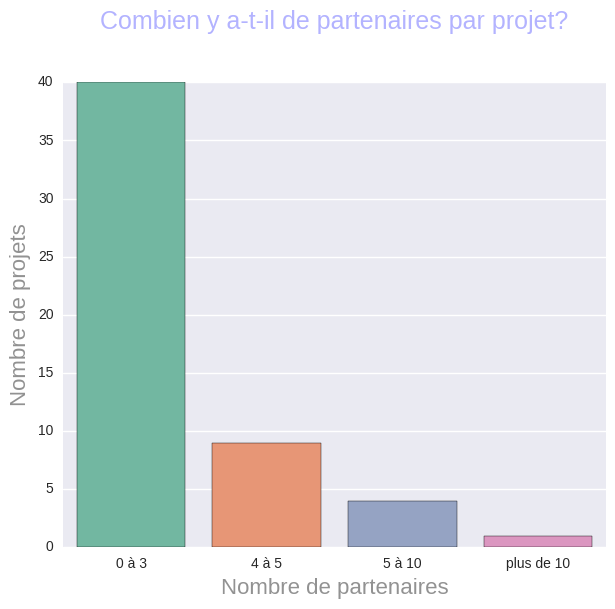

In [149]:
# Nombre de projets par années
# TODO : parse end date
def getKey(item):
    return item[0]

# Nombres et types d’organismes partenaires
print "* moyenne de partenaires par projet: %s"%moyenne([len(p) for p in projets_partenaires])

partenaires_counts=[] 
for count in [len(p) for p in projets_partenaires]:
    if count <= 3 : partenaires_counts.append("0 à 3")
    elif count > 3 and count <6 : partenaires_counts.append("4 à 5")
    elif count > 5 and count < 10 : partenaires_counts.append("5 à 10")
    elif count > 9 : partenaires_counts.append("plus de 10")

order = ["0 à 3", "4 à 5", "5 à 10","plus de 10"]
count_plot([p.decode('utf-8') for p in partenaires_counts], 
           ylabel="Nombre de projets", 
           xlabel="Nombre de partenaires", 
           title="Combien y a-t-il de partenaires par projet?",
           order=[t.decode('utf-8') for t in order])


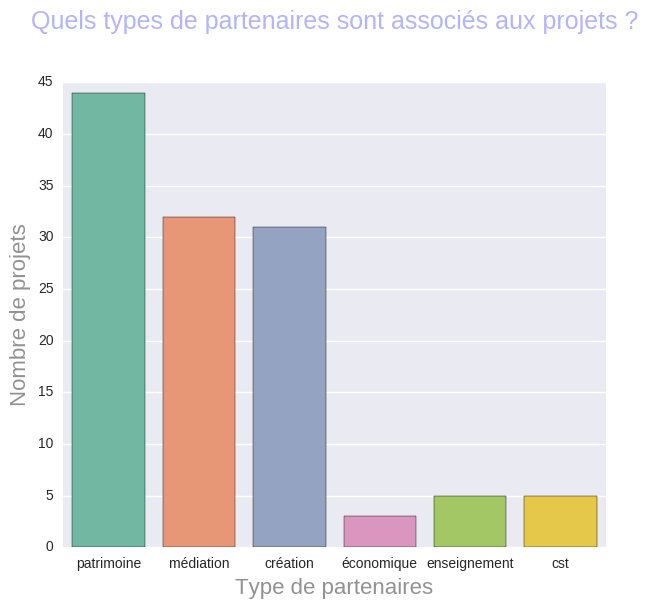

In [150]:
# type de partenaires
projets_partenaires_type = []
for ps in projets_partenaires: 
    projets_partenaires_type += [ G_with_projects.node[p]["type"] for p in ps if G_with_projects.node[p]["type"] not in ["these", "ADR", "localité", "postdoc"] ]

count_plot([t.decode('utf-8') for t in projets_partenaires_type], ylabel="Nombre de projets", xlabel="Type de partenaires", title='Quels types de partenaires sont associés aux projets ?')


In [151]:
# Nombre de projets par villes
projets_partenaires_villes = []
for ps in projets_partenaires: 
    projets_partenaires_villes += [ infos[p]["ville"].strip() for p in ps if infos[p]["ville"].strip() != ""]

show_table("### Dans quelles villes se trouvent les partenaires des projets ?", projets_partenaires_villes )

### Dans quelles villes se trouvent les partenaires des projets ?

| | Nom | Quantité |
| --- | --- | --- |
| 0 | Lyon | 44 | 
| 1 | Grenoble | 20 | 
| 2 | Paris | 14 | 
| 3 | Valence | 5 | 
| 4 | Annecy | 3 | 
| 5 | Saint-Étienne | 3 | 
| 6 | Ambérieu-en-Bugey | 2 | 
| 7 | Chambéry | 2 | 
| 8 | Bourg-en-Bresse | 2 | 
| 9 | Oullins | 2 | 
| 10 | Villeurbanne | 2 | 
| 11 | Tours | 2 | 
| 12 | Amiens | 1 | 
| 13 | La Motte D’Aveillans | 1 | 
| 14 | Voreppe | 1 | 
| 15 | La Mure | 1 | 
| 16 | Vaulx-en-Velin | 1 | 
| 17 | Lodi (Italie) | 1 | 
| 18 | Toussieu | 1 | 
| 19 | Egletons | 1 | 
| 20 | Vérone (Italie) | 1 | 
| 21 | St-Martin-le-Vinoux | 1 | 
| 22 | Caen | 1 | 
| 23 | Bois d'Arcy | 1 | 
| 24 | Saint-Priest | 1 | 
| 25 | Vulaines | 1 | 
| 26 | Yverdon-les-Bains (Suisse) | 1 | 
| 27 | Marseille | 1 | 
| 28 | Meylan | 1 | 
| 29 | Saint-Priest-en-Jarez | 1 | 
| 30 | Bron | 1 | 
| 31 | La Motte-Servolex | 1 | 


## Relations au sein du réseau

Etudions maintenant les relations visibles au sein du réseau 

In [154]:
# Nombre et fréquence des partenariats entre centres de recherche
edges_labos_to_labos = []
for e in G_without_projects.edges():
    if G_without_projects.node[e[0]]["type"] == "laboratoire" and G_without_projects.node[e[1]]["type"] == "laboratoire":
        edges_labos_to_labos.append(e)
print "nombre de partenariats identifiés entre labos: %s"%len(edges_labos_to_labos)

nombre de partenariats identifiés entre labos: 11


In [155]:
# Relations entre laboratoires et partenaires (nombre de liens entre les différents partenaires culture et recheches)
partenaires_types= ["creation", "patrimoine", "médiation", "enseignement", "cst", "economique"]
edges_partenaires_et_labos = []
for e in G_without_projects.edges():
    if (G_without_projects.node[e[0]]["type"] == "laboratoire" and G_without_projects.node[e[1]]["type"] in partenaires_types) or (G_without_projects.node[e[0]]["type"] in partenaires_types and G_without_projects.node[e[1]]["type"] == "laboratoire"):
        edges_partenaires_et_labos.append(e)
print "nombre de partenariats identifiés entre labos et partenaires: %s"%len(edges_partenaires_et_labos)

nombre de partenariats identifiés entre labos et partenaires: 170


In [157]:
# Relations géographiques


## Evolution temporelle depuis les clusters 13 et 14

* Les clusters 13 et 14
* Nombre de projets / type de projets (par cluster)
* Relations entre projets / partenaires (par cluster)
* Comparaison du nombre de projets
* Comparaison du nombre de partenaires par projets
* Permanence et évolution entre les projets ARC5 et cluster 13 / 14 (continuité des projets)

In [158]:
import csv

fichier_projets = "../final/ARC5-Final - Projets (tous).csv"

projets = []
with open( fichier_projets, "r") as f :
    reader = csv.DictReader(f)
    for line in reader :
        projets.append(line)

table = "|Type|Organisation|Quantité| \n"
table += "|---|---|---|\n"
orgas = Counter([(p["Type"], p["Orga"]) for p in projets])
for c in orgas:
    table += "|%s|%s|%s|\n"%(c[0],c[1],orgas[c])

display(Markdown("### Quels types de projets dans les différentes organisations ?"))
display(Markdown(table))


### Quels types de projets dans les différentes organisations ?

|Type|Organisation|Quantité| 
|---|---|---|
|postdoc|ARC5|1|
|projet|14|51|
|ADR|14|17|
|projet|13|156|
|projet|ARC5|54|
|ADR|13|11|
|ADR|ARC5|57|


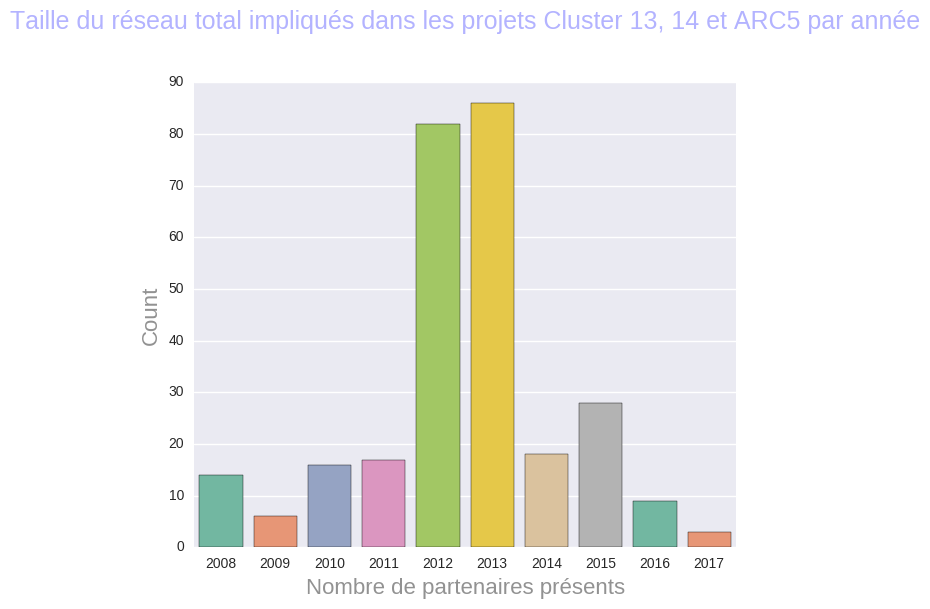

In [159]:
# taille du réseau par années
years= [n[1]["start"] for n in G_without_projects.nodes(data=True)]
Counter(years)

count_plot(
    years, 
    xlabel="Nombre de partenaires présents", 
    title='Taille du réseau total impliqués dans les projets Cluster 13, 14 et ARC5 par année')